In [1]:
# Gini index: [0,0.5]
# Information Gain:[0,1]
# CART: Classification and regression Tree
# Decision Tree pruning: used to avoid overfitting 

## Problem Statement: Identify either note is Genuine or not using predictive modelling and with the help of Decision tree

#### import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### lets Create input and output data

In [4]:
X = df.drop(columns='Class')
X[:3]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645


In [5]:
y = df['Class']
y[:3]

0    0
1    0
2    0
Name: Class, dtype: int64

#### splitting the dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

#### Import Descision tree algo

In [8]:
# current problem is binary classification problem
# hence classifier will be used

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [11]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
model.classes_

array([0, 1], dtype=int64)

#### prediction

In [13]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [14]:
y_test[:5]

117     0
548     0
1264    1
176     0
937     1
Name: Class, dtype: int64

#### Lets check trianing data score

In [15]:
model.score(X_train,y_train)*100

100.0

In [16]:
model.score(X_test,y_test)*100

99.63636363636364

#### performance metrics

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
confusion_matrix(y_test,y_pred)

array([[146,   1],
       [  0, 128]], dtype=int64)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       147
           1       0.99      1.00      1.00       128

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [20]:
model.criterion

'gini'

#### Lets apply entropy

In [21]:
model2 = DecisionTreeClassifier(criterion='entropy')
model2

DecisionTreeClassifier(criterion='entropy')

In [22]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
y_pred2 = model2.predict(X_test)
y_pred2[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [24]:
confusion_matrix(y_test,y_pred2)

array([[144,   3],
       [  1, 127]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       147
           1       0.98      0.99      0.98       128

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



### Cross Validation

In [26]:
X[:5]

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [27]:
y[:4]

0    0
1    0
2    0
3    0
Name: Class, dtype: int64

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cv_score = cross_val_score(model,X,y)
cv_score

array([0.98909091, 0.96727273, 0.97445255, 0.98540146, 0.98540146])

In [30]:
cv_score.mean()*100

98.03238221632384

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LR = LogisticRegression()
LR

LogisticRegression()

In [33]:
cv1 = cross_val_score(LR,X,y)
cv1

array([0.98909091, 0.98909091, 0.98175182, 1.        , 0.98905109])

In [34]:
cv1.mean()*100

98.97969475779695

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gnb = GaussianNB()
gnb

GaussianNB()

In [37]:
cv2 = cross_val_score(gnb,X,y)
cv2

array([0.85818182, 0.8       , 0.79927007, 0.88321168, 0.85036496])

In [38]:
cv2.mean()*100

83.82057067020571

#### we have 2 options: Stratified vs Kfold cross validation

In [39]:
"""[0,1,2,3,4,5,6,7]
Train: [1 2 3 5 6 7] | test: [0 4]
Train: [0 2 3 4 6 7] | test: [1 5]
Train: [0 1 3 4 5 7] | test: [2 6]
Train: [0 1 2 4 5 6] | test: [3 7]
StratifiedKFold done

Train: [2 3 4 5 6 7] | test: [0 1]
Train: [0 1 4 5 6 7] | test: [2 3]
Train: [0 1 2 3 6 7] | test: [4 5]
Train: [0 1 2 3 4 5] | test: [6 7]
KFold done
"""

'[0,1,2,3,4,5,6,7]\nTrain: [1 2 3 5 6 7] | test: [0 4]\nTrain: [0 2 3 4 6 7] | test: [1 5]\nTrain: [0 1 3 4 5 7] | test: [2 6]\nTrain: [0 1 2 4 5 6] | test: [3 7]\nStratifiedKFold done\n\nTrain: [2 3 4 5 6 7] | test: [0 1]\nTrain: [0 1 4 5 6 7] | test: [2 3]\nTrain: [0 1 2 3 6 7] | test: [4 5]\nTrain: [0 1 2 3 4 5] | test: [6 7]\nKFold done\n'

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [41]:
X = np.array([
    [1,2,3,4],
    [11,12,13,14],
    [21,22,23,24],
    [31,32,33,34],
    [41,42,43,44],
    [51,52,53,54],
    [61,62,63,64],
    [71,72,73,74]
])
X

array([[ 1,  2,  3,  4],
       [11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34],
       [41, 42, 43, 44],
       [51, 52, 53, 54],
       [61, 62, 63, 64],
       [71, 72, 73, 74]])

In [42]:
y = np.array([0,0,0,0,1,1,1,1])
y

array([0, 0, 0, 0, 1, 1, 1, 1])

In [43]:
kf = KFold(n_splits=4)
kf

KFold(n_splits=4, random_state=None, shuffle=False)

In [44]:
list(kf.split(X))

[(array([2, 3, 4, 5, 6, 7]), array([0, 1])),
 (array([0, 1, 4, 5, 6, 7]), array([2, 3])),
 (array([0, 1, 2, 3, 6, 7]), array([4, 5])),
 (array([0, 1, 2, 3, 4, 5]), array([6, 7]))]

In [45]:
skf = StratifiedKFold(n_splits=4)
skf

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)

In [46]:
list(skf.split(X,y))

[(array([1, 2, 3, 5, 6, 7]), array([0, 4])),
 (array([0, 2, 3, 4, 6, 7]), array([1, 5])),
 (array([0, 1, 3, 4, 5, 7]), array([2, 6])),
 (array([0, 1, 2, 4, 5, 6]), array([3, 7]))]

#### output is: array[train_index]  array[test_index]

In [47]:
for train_index,test_index in skf.split(X,y):
    print(train_index,test_index)

[1 2 3 5 6 7] [0 4]
[0 2 3 4 6 7] [1 5]
[0 1 3 4 5 7] [2 6]
[0 1 2 4 5 6] [3 7]


In [48]:
for train_index,test_index in skf.split(X,y):
    print(X[train_index],X[test_index])

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]] [[ 1  2  3  4]
 [41 42 43 44]]
[[ 1  2  3  4]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]
 [61 62 63 64]
 [71 72 73 74]] [[11 12 13 14]
 [51 52 53 54]]
[[ 1  2  3  4]
 [11 12 13 14]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [71 72 73 74]] [[21 22 23 24]
 [61 62 63 64]]
[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]] [[31 32 33 34]
 [71 72 73 74]]


In [49]:
X

array([[ 1,  2,  3,  4],
       [11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34],
       [41, 42, 43, 44],
       [51, 52, 53, 54],
       [61, 62, 63, 64],
       [71, 72, 73, 74]])

### DT visualization

In [50]:
from sklearn import tree

In [51]:
X = df.iloc[:,:-1]
X[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [52]:
model

DecisionTreeClassifier()

In [53]:
text_representation = tree.export_text(model,feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'])
print(text_representation)

|--- Variance <= 0.32
|   |--- Skewness <= 7.57
|   |   |--- Variance <= -0.46
|   |   |   |--- Curtosis <= 6.22
|   |   |   |   |--- Skewness <= 7.29
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Skewness >  7.29
|   |   |   |   |   |--- Entropy <= -4.11
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Entropy >  -4.11
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Curtosis >  6.22
|   |   |   |   |--- Skewness <= -4.72
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Skewness >  -4.72
|   |   |   |   |   |--- Curtosis <= 6.61
|   |   |   |   |   |   |--- Curtosis <= 6.34
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Curtosis >  6.34
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Curtosis >  6.61
|   |   |   |   |   |   |--- class: 0
|   |   |--- Variance >  -0.46
|   |   |   |--- Skewness <= 5.49
|   |   |   |   |--- Curtosis <= 2.62
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Curtosis >  2.6

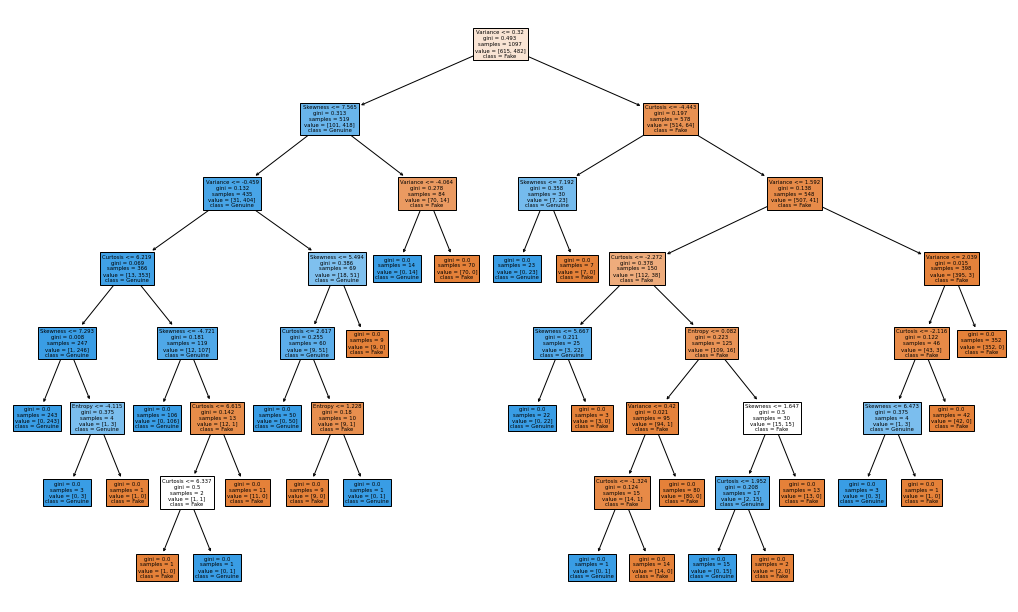

In [54]:
fig = plt.figure(figsize=(18,11))
_ = tree.plot_tree(model, 
                   feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'],  
                   class_names=['Fake','Genuine'],
                   filled=True)
plt.savefig('sample.png', dpi=200)

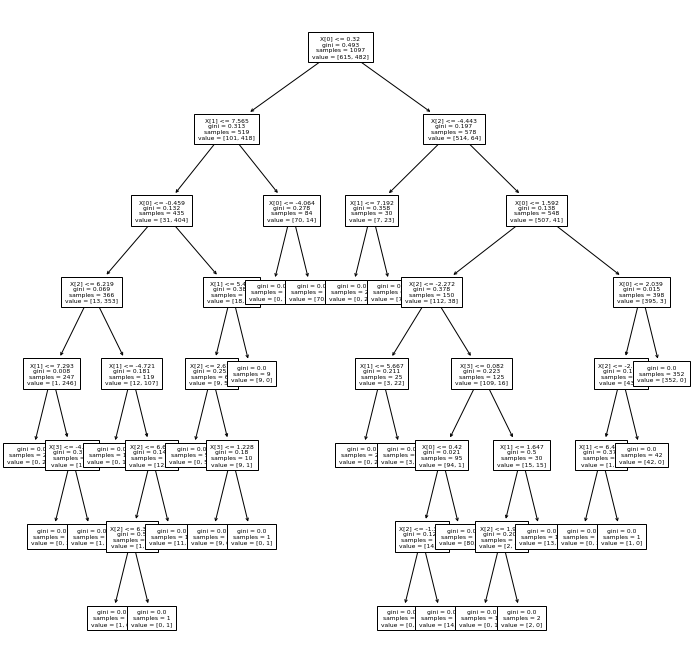

In [55]:
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

### Hyperparameter using GridSearch CV

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
pr_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2,3,4,5,6,8],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2],
    'min_weight_fraction_leaf':[0.0,0.5]
    } 
pr_grid

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [2, 3, 4, 5, 6, 8],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 2],
 'min_weight_fraction_leaf': [0.0, 0.5]}

In [58]:
out = GridSearchCV(DecisionTreeClassifier(),pr_grid)
out

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'min_weight_fraction_leaf': [0.0, 0.5],
                         'splitter': ['best', 'random']})

In [59]:
X[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [60]:
y = df.Class
y[:2]

0    0
1    0
Name: Class, dtype: int64

#### train over x and y supply GridSearchCV

In [61]:
out.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'min_weight_fraction_leaf': [0.0, 0.5],
                         'splitter': ['best', 'random']})

In [62]:
out.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'best'}

In [63]:
out.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3)

In [64]:
final = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3)
final

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3)

In [65]:
final.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3)

In [66]:
final.score(X,y)*100

99.9271137026239

In [67]:
final.score(X_train, y_train)*100

99.90884229717412

In [68]:
final.score(X_test, y_test)*100

100.0

### Module Interface :
- dumps() – This function is called to serialize an object hierarchy.
- loads() – This function is called to de-serialize a data stream.

### Serialization

In [69]:
import pickle

#### save the DT_model to disk

In [70]:
filename = 'DT.pickle'
pickle.dump(final, open(filename, 'wb'))

### De Serialization

#### end user/testing  team/ client/ devops team will use pickled file

In [71]:
check = pickle.load(open('DT.pickle','rb'))
check

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3)